**2021 Airbnb Data for NYC**

In [37]:
# Dataset from https://www.kaggle.com/sarthakniwate13/air-bnb-nyc-data

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,8)})

**Questions Trying to answer:**
  1. How long does someone typically rent out an AirBnB
    - Which borough has the lowest minimum nights?
    - Which borough has the highest or lowest prices per night?
  2. What kind of properties are rented out the most?
    - What kind of price point have the most reviews?
  3. Is there a relationship between the number of reviews and the price?
  4. How does prices per night compare with a place like california?

In [38]:
# Reading from csv

df = pd.read_csv("Airbnb_NYC.csv")
df.head

<bound method NDFrame.head of             Boroughs  Latitude  Longitude    Prop_Type  Min_Nights  \
0              Bronx  40.80011  -73.91330  PrivateRoom        21.0   
1              Bronx  40.80024  -73.91422  PrivateRoom         3.0   
2              Bronx  40.80074  -73.91574  PrivateRoom         3.0   
3              Bronx  40.80091  -73.91449  PrivateRoom        21.0   
4              Bronx  40.80143  -73.91353   EntireHome         2.0   
...              ...       ...        ...          ...         ...   
38728  Staten Island  40.64641  -74.08502   EntireHome         2.0   
38729  Staten Island  40.64682  -74.08734  PrivateRoom        20.0   
38730  Staten Island  40.64730  -74.08408  PrivateRoom        30.0   
38731  Staten Island  40.64762  -74.08682   EntireHome         3.0   
38732  Staten Island  40.64779  -74.08460   EntireHome         1.0   

       Host_Listing_Cnt  Days_Available  Review_Cnt  Reviews30d  Price  
0                   2.0             291          19     

**Latitude and Longitude** - Geographical location of the property

**Prop_Type** - The type of property as Private Room, Entire House

**Min_Nights** - Minimum nights of stay

**Host_Listing_Cnt** - How long they have listed it

**Days_Available** - Availability of property in days

**Review_Cnt** - Count of reviews in the property

**Reviews30d** - Activeness of reviews/ how many reviews have been posted in 30 days

**Price** - What is the market price they are askin for

In [39]:
# Dropping missing data that has no prices associated with the airbnb listing
df = df.dropna(subset=["Price"], axis=0)

In [40]:
boroughs = df["Boroughs"].unique()
prop_types = df["Prop_Type"].unique()
df.describe()

,Latitude,Longitude,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,38724.000000,38724.000000,38686.000000,38369.000000,38724.00000,38724.000000,38724.000000,38724.000000
mean,40.727856,-73.950741,5.522980,2.987151,114.22539,29.508728,1.365624,140.879248
std,0.055278,0.047170,10.817101,8.414091,130.17846,48.655314,1.692818,194.490892
min,40.506410,-74.244420,1.000000,1.000000,0.00000,1.000000,0.010000,10.000000
25%,40.688450,-73.982300,1.000000,1.000000,0.00000,3.000000,0.190000,68.000000
50%,40.721490,-73.954610,2.000000,1.000000,50.00000,10.000000,0.710000,100.000000
75%,40.762820,-73.934480,4.000000,2.000000,234.00000,33.000000,2.000000,169.000000
max,40.912400,-73.712990,300.000000,96.000000,365.00000,639.000000,66.610000,10000.000000


<AxesSubplot:>

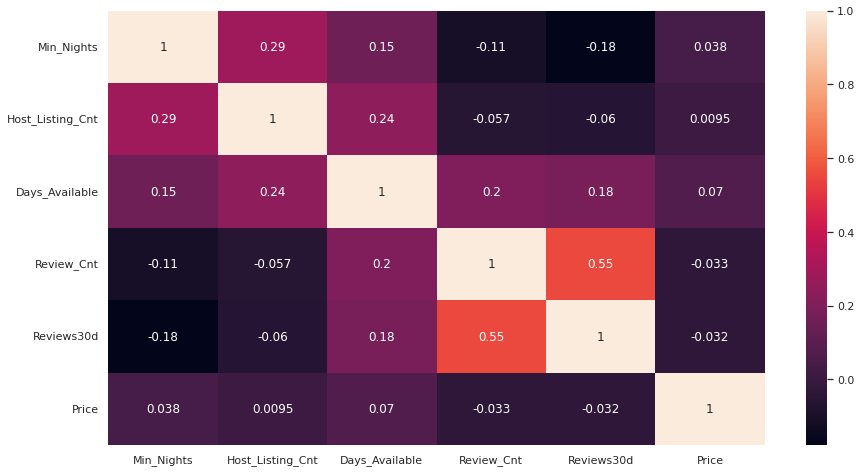

In [41]:
from numpy.lib.function_base import corrcoef

sns.heatmap(df.drop(['Longitude', 'Latitude'], axis=1).corr(), annot=True)

# Correlation Matrix
### Looking at the correlation Matrix we can find some insights in what features may have any linear correlations to each other.
Looking at Min_Nights and Host_Listing_Cnt we can see there is a weak correlation in that the higher the minimum nights the higher the host listing count. Suggesting if you want people to airbnb your listing you should set a lower minimum nights. Also looking at the days available there is a weak correlation suggesting that property listing are more likely to be available for longer if the minimum nights are higher.

WE can take a look at which boroughs and property types have lower min nights listed and host listing counts as well as less available.


<AxesSubplot:title={'center':'Property Types'}, ylabel='None'>

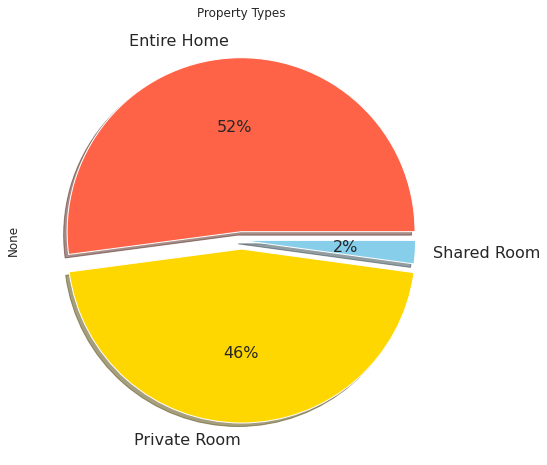

In [42]:
# Creates the labels for each category in Property Type
def label_function(val):
    return f'{val:.0f}%'

explode = (0.05, 0.05, 0)

df.groupby('Prop_Type').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 16},
                                  colors=['tomato', 'gold', 'skyblue'], title="Property Types", labels=["Entire Home",  "Private Room", "Shared Room"], explode=explode, shadow=True)


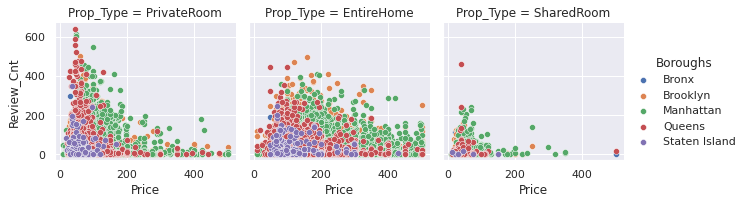

In [43]:
# Most of the reviews are around the price point of the median price for private rooms of 75
g = sns.FacetGrid(df[(df['Price'] <= 500)], col="Prop_Type", hue="Boroughs")
g.map(sns.scatterplot, "Price", "Review_Cnt")
g.add_legend()

<AxesSubplot:xlabel='Price', ylabel='Reviews30d'>

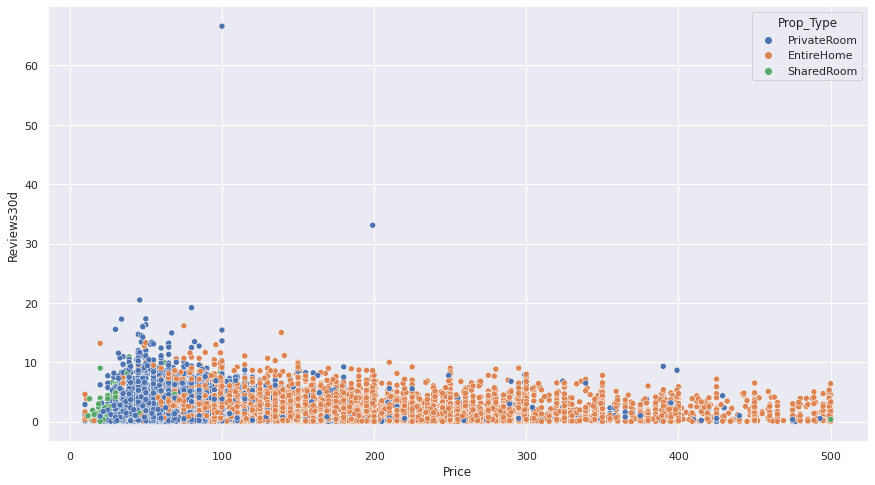

In [44]:
sns.scatterplot(data=df[df['Price'] <= 500], x="Price", y="Reviews30d", hue="Prop_Type")

<AxesSubplot:xlabel='Price', ylabel='Review_Cnt'>

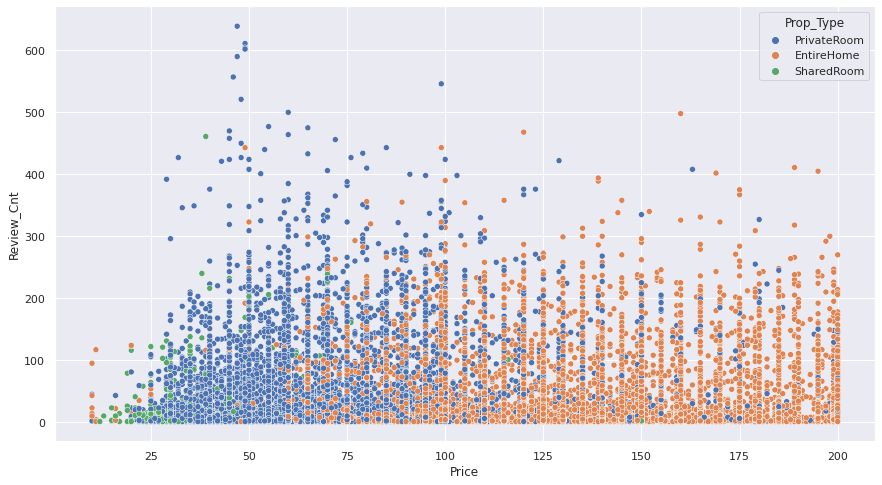

In [45]:
sns.scatterplot(data=df[df['Price'] <= 200], x="Price", y="Review_Cnt", hue="Prop_Type")

In [46]:
med_price_of_shared_room = df[df['Prop_Type'] == 'SharedRoom']['Price'].median()
med_price_of_private_room = df[df['Prop_Type'] == 'PrivateRoom']['Price'].median()
med_price_of_entire_house = df[df['Prop_Type'] == 'EntireHome']['Price'].median()

df[df['Prop_Type'] == 'SharedRoom'].describe().drop(labels=["Latitude", "Longitude"], axis=1)



,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,4.140811,4.840095,169.105012,23.491647,1.492947,63.109785
std,9.228118,6.292604,150.093538,39.170574,1.636828,95.722992
min,1.000000,1.000000,0.000000,1.000000,0.020000,10.000000
25%,1.000000,1.000000,5.000000,3.000000,0.280000,32.000000
50%,1.000000,3.000000,126.000000,9.000000,1.000000,45.000000
75%,3.000000,6.000000,342.000000,25.000000,2.097500,69.000000
max,100.000000,36.000000,365.000000,461.000000,10.900000,1800.000000


In [47]:
df[df['Prop_Type'] == 'PrivateRoom'].describe().drop(labels=["Latitude", "Longitude"], axis=1)

,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,17704.000000,17637.000000,17714.000000,17714.000000,17714.000000,17714.000000
mean,4.370707,2.608777,115.090663,30.713108,1.433753,83.992661
std,9.421168,4.400397,131.189635,51.929501,1.833939,146.500472
min,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,1.000000,1.000000,0.000000,3.000000,0.200000,50.000000
50%,2.000000,1.000000,54.000000,10.000000,0.760000,70.000000
75%,3.000000,3.000000,228.000000,35.000000,2.060000,91.000000
max,300.000000,96.000000,365.000000,639.000000,66.610000,10000.000000


In [48]:
df[df['Prop_Type'] == 'EntireHome'].describe().drop(labels=["Latitude", "Longitude"], axis=1)

,Min_Nights,Host_Listing_Cnt,Days_Available,Review_Cnt,Reviews30d,Price
count,20144.000000,19894.000000,20172.000000,20172.000000,20172.000000,20172.000000
mean,6.593179,3.244546,111.185703,28.701071,1.300507,194.064842
std,11.865162,10.834063,127.864757,45.929383,1.558080,217.871630
min,1.000000,1.000000,0.000000,1.000000,0.010000,10.000000
25%,2.000000,1.000000,0.000000,3.000000,0.180000,115.000000
50%,3.000000,1.000000,43.000000,9.000000,0.650000,150.000000
75%,5.000000,1.000000,232.000000,32.000000,2.000000,219.000000
max,265.000000,96.000000,365.000000,498.000000,16.130000,10000.000000


<AxesSubplot:xlabel='Prop_Type', ylabel='Price'>

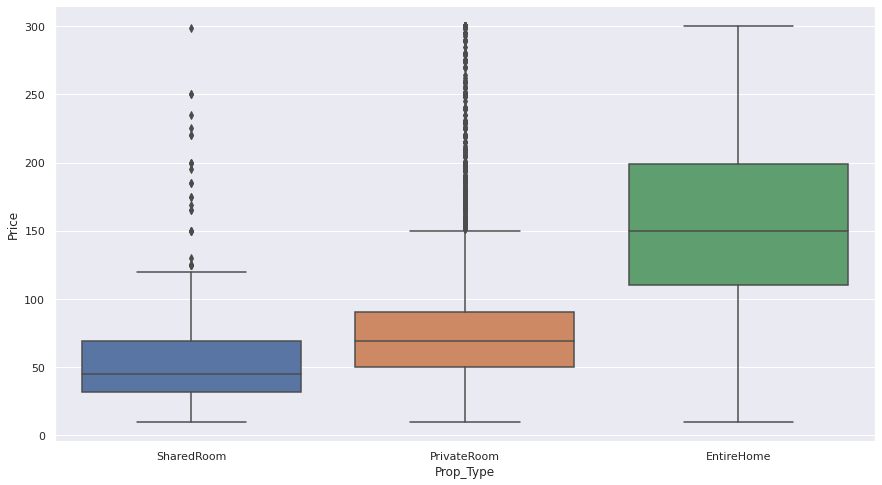

In [49]:
sns.boxplot(data=df[df['Price'] <= 300], x="Prop_Type", y="Price", order=["SharedRoom", "PrivateRoom", "EntireHome"])

<AxesSubplot:xlabel='Boroughs', ylabel='Price'>

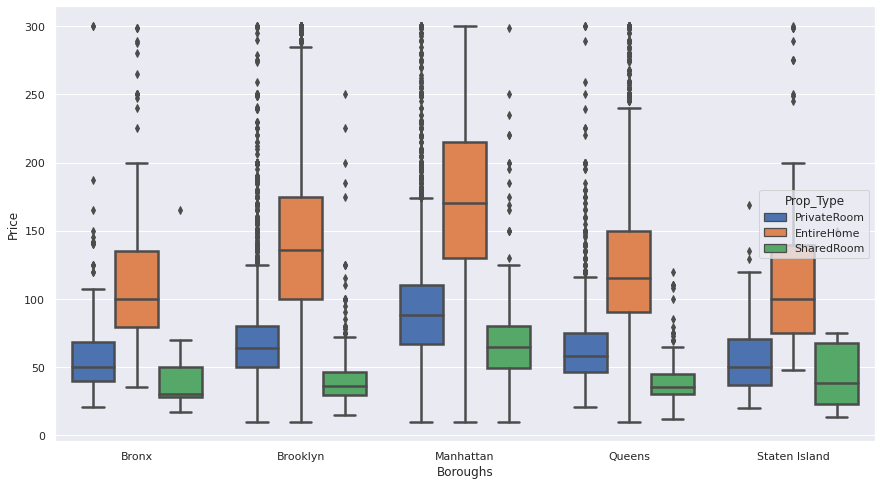

In [50]:

# T
sns.boxplot(data=df[df['Price'] <= 300], x="Boroughs", y="Price", hue="Prop_Type", linewidth=2.5, saturation=1)

In [51]:
# Modeling
# Removing the Latitude, Longitude features and Reviews30d

df = df.drop(labels=["Latitude", "Longitude", "Reviews30d"], axis=1)
df = df.dropna()
df.head

<bound method NDFrame.head of             Boroughs    Prop_Type  Min_Nights  Host_Listing_Cnt  \
0              Bronx  PrivateRoom        21.0               2.0   
1              Bronx  PrivateRoom         3.0               1.0   
2              Bronx  PrivateRoom         3.0               1.0   
3              Bronx  PrivateRoom        21.0               2.0   
4              Bronx   EntireHome         2.0               3.0   
...              ...          ...         ...               ...   
38728  Staten Island   EntireHome         2.0               1.0   
38729  Staten Island  PrivateRoom        20.0               1.0   
38730  Staten Island  PrivateRoom        30.0               4.0   
38731  Staten Island   EntireHome         3.0               1.0   
38732  Staten Island   EntireHome         1.0               1.0   

       Days_Available  Review_Cnt  Price  
0                 291          19   60.0  
1                   0          59   49.0  
2                 354           3   

In [52]:
# Trying to predict the price using the Boroughs, Prop_Type, Min_Nights and Host_Listing_Cnt... etc

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 7:] = sc.fit_transform(X_train[:, 7:])
X_test[:, 7:] = sc.transform(X_test[:, 7:])

print(X_train[0])
print(y_train[0])


[0.0 0.0 1.0 0.0 0.0 0.0 1.0 -0.15025461655108763 -0.41308268085320043
 0.24229453689419658 1.5742793452533472 -0.5675442324963159]
179.0


In [53]:
# Creating model using SVR
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
# regressor.fit(X_train,y_train)

# #y_pred = regressor.predict(X_test)
# #print(y_pred)



In [54]:
from helpers import


Accuracy: -54.10 %


Accuracy: 11.76 %
